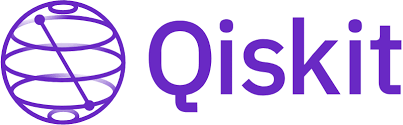

# Introducción a Qiskit
En este taller mostraremos los elementos básicos de Qiskit. Este es un modulo de python desarrollado por la empresa IBM para la manipulación de computadores cuánticos. 

Podemos instalar Qiskit escribiendo en la terminal de anaconda "pip install qiskit"

En nuestro caso utilizaremos la herramienta otorgada por IBM llamada "IBM Lab".

Para comenzar importaremos la herramienta numpy de python

In [ ]:
import numpy as np

## Estados cuánticos

Recordemos que los estados cuánticos de un bit cuántico son vectores de la forma

$$|\psi\rangle = \cos(\theta)|0\rangle + \sin(\theta) e^{i\phi}|1\rangle = \begin{bmatrix} \cos(\theta) \\ \sin(\theta) e^{i\phi} \end{bmatrix}, $$

donde $\theta$ y $\phi$ son ángulos que definen la esfera de Bloch. De este modo, los estados estan representados por puntos sobre esta esfera.


Por ejemplo, consideremos los siguientes estados:

$$ |\psi_1\rangle = |0\rangle = \begin{bmatrix} 1 \\ 0   \end{bmatrix}$$

$$ |\psi_2\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle ) = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1   \end{bmatrix}$$

$$ |\psi_3\rangle = \frac{1}{\sqrt{2}}( |0\rangle + i |1\rangle ) \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i   \end{bmatrix}$$


Que pueden ser escritos como 

In [89]:
psi1 = [ 1, 0 ] #estado fundamental
psi2 = [ 1/np.sqrt(2), 1/np.sqrt(2) ] 
psi3 = [ 1/np.sqrt(2), 1j/np.sqrt(2) ] 

Utilizaremos el paquete para gráficar 

In [90]:
from qiskit.visualization import plot_bloch_multivector

In [ ]:
plot_bloch_multivector( psi1 )
# función que grafica el vector de Bloch , con el vector dentro del paréntesis

In [ ]:
plot_bloch_multivector( psi2 )

In [ ]:
plot_bloch_multivector( psi3)

**Ejercicio 1**: Grafica las esfera de Bloch para los siguiente estados:

$$ |\psi_4\rangle = \frac{1}{\sqrt{5}}( |0\rangle + 2|1\rangle ) = \frac{1}{\sqrt{5}} \begin{bmatrix} 1 \\ 2 \end{bmatrix}$$

$$ |\psi_5\rangle = \frac{1}{\sqrt{2}}( |0\rangle - e^{i\pi/3} |1\rangle ) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -e^{i\pi/3}\end{bmatrix} $$


Hint: Considere la función np.exp de numpy

In [ ]:
#Respuesta 1:

La esfera de Bloch no esta definida para estados cuánticos de más de un 
qubit. Para graficar ese tipos de estado podemos utilizar la Q-esfera.

Recordemos que los estados de dos qubits corresponden a la representación producto tensorial entre ambos

$$ |0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

In [ ]:
from qiskit.visualization import plot_state_qsphere

In [ ]:
state_2qubits = [ 1, 0, 0, 0]
plot_state_qsphere( state_2qubits )

Analogamente para3-qubits
$$ |0\rangle \otimes |0\rangle \otimes |0\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$


In [ ]:
state_3qubits = [ 1, 0, 0, 0, 0, 0, 0, 0]
plot_state_qsphere( state_3qubits )

## Elementos básicos de Qiskit

`QuantumCircuit` es una clase que nos permite crear circuitos cuánticos. Esta necesita que le especifiquemos los bits cuánticos (qubits) y los bits clásicos (clbits), lo cual se puede hacer con las clases `QuantumRegister` y `ClassicalRegister`.

Importamos ambos elementos desde Qiskit

Elementos que se van a ocupar en toda la escuela!!

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [ ]:
#Creación de registros
reg_cuant = QuantumRegister( 1 , name='qubit' )    #Registro cuántico llamado 'qubit'
reg_clas  = ClassicalRegister( 1 , name='clbit' )  #Registro clásico llamado 'clbit'
qc = QuantumCircuit( reg_cuant, reg_clas ) #Creamos un circuito cuantico con 1 qubit y 1 clbit

Podemos visualizar este circuito con el función draw. Este es un circuito inicializado en el estado  |0⟩.

In [ ]:
#Dibujemos el circuito cuántico mediante matplotlib función .draw
qc.draw( output='mpl' ) 

# Los nombres de cada registro aparecen a la izquierda, los registros cuánticos siempre aparecen arriba y los clásicos abajo.
# El circuito siempre inicia en el estado fundamental.

In [ ]:
#Definamos un estado inicial y grafiquemoslo en la esfera de Bloch
state_init = [ 1, 0 ]
plot_bloch_multivector( state_init )

La clase `QuantumCircuit` tiene definidas funciones para aplicar las puertas cuánticas. La puerta $X$ definida como

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$

lo cual nos permite negar el estado de un qubit, es decir

$$ X|0\rangle = |1\rangle $$
$$ X|1\rangle = |0\rangle $$

Para introducir una puerta $X$ en nuestro circuito basta con usar el siguiente comando:

In [ ]:
qc.x(0)
qc.draw( output='mpl' )
# La primera linea (o qubit) es la linea (qubit) 0.

Otra puerta cuántica muy importante es la Hadamard $H$,

$$ H = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

la cual permite transformar el estado del qubit en una superposición, un fenómeno cuántico!, al aplicarla sobre los estados $|0\rangle$ y $|1\rangle$ obtenemos

$$ H|0\rangle = \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  ) $$
$$ H|1\rangle = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ) $$

Creemos nuevamente nuestro circuito, pero esta vez simplificando, y apliquemos una $H$:

In [ ]:
 #Si no usas registros cuánticos, crea uno automaticamente con nombre genérico
qc = QuantumCircuit( 1, 1 ) 
qc.h(0)
qc.draw( output='mpl' ) 

Podemos cambiar la fase de un estado utilizando la puerta $Z$,

$$ Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} $$

al aplicarla sobre los estados $|0\rangle$ y $|1\rangle$ obtenemos

$$ Z|0\rangle = |0\rangle $$
$$ Z|1\rangle = -|1\rangle $$

Si la aplicamos sobre un estado superposición, nos permite cambiar su fase local

$$ Z\left( \frac{1}{\sqrt{2}}( |0\rangle + |1\rangle  )  \right) = \frac{1}{\sqrt{2}}( |0\rangle - |1\rangle  ). $$

En la siguiente celda mostramos como implementar esto en un circuito cuántico. 

Acá introducimos una barrera con la función `barrier()`, cuya función es simplemente separar visualmente distintas secciones de un circuito. El lado izquierdo de la barrera prepara el estado superposición mediante una $H$, y el lado derecho le cambia la fase local con una puerta $Z$.

In [ ]:
# Así creamos circuitos con solo registros cuánticos
qc = QuantumCircuit( 1 )   #solo registro cuántico, el registro cuántico está escondido
qc.h(0)
qc.barrier() #función barrera para ir ordenando visualmente el circuito
qc.z(0) 
qc.draw( output='mpl' ) 

Podemos introducir entrelazamiento entre dos qubits empleando la compuerta controlled-not $CX$. Si el estado de 2 qubits es $|c,t\rangle,$ tenemos que el qubit target $|t\rangle$ es negado si el qubit control $|c\rangle$ vale 1, es decir:

$$CX|00\rangle = |00\rangle $$
$$CX|01\rangle = |01\rangle $$
$$CX|10\rangle = |11\rangle $$
$$CX|11\rangle = |10\rangle $$

Notemos que Qiskit etiqueta los qubits de derecha a izquierda, es decir $|c\rangle$ es el qubit 0 y $|t\rangle$ es el qubit 1.

La compuerta $CX$ en su representación matricial,

$$ CX = \begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{bmatrix} $$

Definamos un circuito de 2 qubits y apliquemos una $CX$. 

In [ ]:
circ_cuant = QuantumCircuit( 2 ) 
circ_cuant.cx( control_qubit=0, target_qubit=1 )
circ_cuant.draw( output='mpl' ) 

# ?circ_cuant.cx , información sobre la función .cx

Veamos un ejemplo más complejo. Consideremos el siguiente estado entrelazado:
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |00\rangle + |11\rangle ) $$
El circuito cuántico que prepara este estado emplea una $H$ y una $CX$.

In [ ]:
#Ejemplo
qc = QuantumCircuit(2)


qc.draw( output='mpl' )

Una herramienta util para estos casos es revisar el estado final de un circuito utilizando `Statevector()`.

In [ ]:
from qiskit.quantum_info import Statevector

In [ ]:
Statevector(qc)
# Representación vectorial del estado cuántico que se obtiene luego de pasar por el circuito

**Ejercicio 2**: Construye un circuito cuántico para preparar el estado
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |01\rangle - |10\rangle ). $$

In [ ]:
#Respuesta 2:

qc = QuantumCircuit()



qc.draw(output='mpl')


In [ ]:
Statevector(qc)

¿Qué pasa al aplicar 2 X consecutivas, 2 CX consecutivas y 2 H consecutivas?

In [ ]:
#Ejemplo 
qc = QuantumCircuit(2)



qc.draw(output='mpl')

In [ ]:
Statevector(qc)

## Mediciones

Las mediciones nos permiten extraer información del estado cuántico. Los resultados son aleatorios y proyectan el estado despues de la medida. Podemos introducir una medición en un circuito mediante la función `measure( qubit, clbit )`, donde debemos especificar que qubits medimos y en que clbit guardamos los resultados. 

In [ ]:
qc = QuantumCircuit( 1, 1 ) 
qc.measure( 0, 0 )  # qubit a medir , bits en donde se guarda la medicion 
qc.draw( output='mpl' ) 

# La información queda almacenada en los bits clásicos

Ahora haremos la SIMULACIÓN de un experimento! Consideremos un circuito cuántico de 1 qubit con una puerta $H$ y una medición

In [ ]:
# en un computador clásico
qc = QuantumCircuit( 1, 1 )
qc.h( 0 )
qc.measure( 0, 0 )
qc.draw(output='mpl')

Qiskit incluye varios simuladores para ejecutar circuitos dentro del módulo `Aer`. 
Para sacar la estadística del experimento.

In [ ]:
from qiskit import Aer  #simulador más general
Aer.backends() #así se obtiene el simulador

Como podemos ver existen muchos simuladores, y cada uno es útil en un contexto diferente. Nosotros utilizaremos el más general de todos, el `aer_simulator`. 

In [ ]:
simulador = Aer.get_backend( "aer_simulator" )

Ejecutamos nuestro circuito mediante el simulador gracias al comando `run`. Recuerda que las mediciones en mecánica cuantica son aleatorias, de modo que debemos repetir la medición varias veces para estimar las probabilidades de cada resultado. Esto lo especificamos con el input `shots`.

In [ ]:
#Generalmente se utilizan shots = 2^13 = 8.192
job = simulador.run( qc, shots=100 )
# shots = corridas del simulador

Al ejecutar el circuito se nos creará un `Job`. Cuando el `Job` haya terminado, extraemos los resultados y posteriormente las cuentas.

In [ ]:
counts = job.result().get_counts() #diccionario con los resultados 
print( counts )

Podemos graficas estas cuentas mediante la funcion `plot_histogram` de `qiskit.visualization`.

In [ ]:
from qiskit.visualization import plot_histogram #herramienta de qiskit

In [ ]:
#Graficamos las cuentas creadas anteriormente en un histogram
plot_histogram( counts )

La Hadamard nos permite preparar un estado igualmente ponderado entre el $|0\rangle$ y el $|1\rangle$, lo cual concuerda con el resultado de la simulación, donde se ve que cada resultado se obtuvo con probabilidad cercana al $50\%$.

**Ejercicio 3**: Construya un circuito que prepare y mida el estado cuántico
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |0\rangle - i |1\rangle ). $$
Tambien realice un gráfico de la cuentas. Hint: busque en el textbook de Qiskit la definición de la puerta de fase (compuerta S).

In [ ]:
# Ejercicio 3

qc3 = QuantumCircuit( )





qc3.draw(output='mpl')

In [ ]:
job = simulador.run( qc3, shots=100 )
counts = job.result().get_counts() #diccionario con los resultados 
print( counts )

In [ ]:
plot_histogram( counts )

**Ejercicio 4**: Construya un circuito que prepare y mida el estado cuántico
$$ |\psi\rangle = \frac{1}{2}( |00\rangle + |01\rangle + |10\rangle + |11\rangle  ). $$
Tambien realice un gráfico de la cuentas.

In [ ]:
# Ejercicio 4

qc4 = QuantumCircuit( , )




In [ ]:
job = simulador.run( qc4, shots=1_000_000 )
counts = job.result().get_counts() #diccionario con los resultados 
print( counts )

In [ ]:
plot_histogram( counts )

Otro simulador muy útil es el `statevector_simulator`, el cual nos entrega el estado cuántico que define un circuito. Es importante destacar que este simulador solo acepta circuitos que NO incluyan MEDICIONES.


In [ ]:
statevector_simulator = Aer.get_backend( "statevector_simulator" )

Tomemos por ejemplo el último circuito. Despues de ejecutarlo con este simulador podemos obtener su estado con el comando `get_statevector()`.

In [ ]:
# Copiar el circuito acá, sin mediciones, y ejecutarlo denuevo.

qc4 = QuantumCircuit(2,2)

qc4.h(0)
qc4.h(1)


In [ ]:
job   = statevector_simulator.run( qc4 )
state = job.result().get_statevector()
state

**Ejercicio 5**: Construya un circuito que prepare el siguiente estado cuántico 
$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |01\rangle + |10\rangle ). $$
Ejecutelo con el `statevector_simulator` y obtenga su estado. Grafique el estado sobre la Q-esfera.

In [ ]:
# Ejercicio 5
qc = QuantumCircuit(  )



qc.draw(output='mpl')

In [ ]:
job   = statevector_simulator.run( qc )
state = job.result().get_statevector()
state

In [ ]:
plot_state_qsphere( state )

**Ejercicio 6**: Construya un circuito que prepare el siguiente estado entrelazado de tres qubits

$$ |\psi\rangle = \frac{1}{\sqrt{2}}( |000\rangle + |111\rangle ). $$

Este estado fue introducido en 1989 por Daniel Greenberger, Michael Horne and Anton Zeilinger, y por eso es conocido como estado GHZ. Hay que destacar que Zeilinger fue galardonado el año 2022 con el premio Nobel de Física por su trabajo en información cuántica!

Utilice el `statevector_simulator` para obtener el estado del ciruito y grafíquelo con la Q-esfera. Posteriormente, incluya mediciones en su circuito y utilice el `aer_simulator` para realizar la simulación del circuito. Grafique un histograma de las cuentas.

In [ ]:
#Ejercicio 6

qc6 = QuantumCircuit(  )


In [ ]:
job   = statevector_simulator.run( qc6 )
state = job.result().get_statevector()
state

In [ ]:
plot_state_qsphere( state )

In [ ]:
qc = QuantumCircuit( 3, 3 ) #agregamos los registros clásicos


qc.draw(output='mpl')

In [ ]:
# agregar mediciones 

qc.measure()


qc.draw(output='mpl')

In [ ]:
job = simulador.run( qc, shots=100 )

In [ ]:
counts = job.result().get_counts()
print( counts )

In [ ]:
plot_histogram( counts )

## Computadores cuánticos reales

También podemos ejecutar nuestros circuitos utilizando computadores cuánticos reales. Primero debemos guardar/cargar nuestra cuenta de IBM Quantum.

OPCIONAL!!
Dependiendo de la arquitectura del computador cuántico la conexión entre qubits es distinta, por tanto es distinta la implementación de las compuertas. Y son optimas para ciertas tareas.

In [ ]:
from qiskit import IBMQ
#TOKEN tiene que estar entre comillas!!
TOKEN = ' '
IBMQ.save_account(TOKEN, overwrite=True) #Guarda tu cuenta. EL TOKEN los encuentras en la web de IBM Quantum.
IBMQ.load_account() # Carga tu cuenta
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main') # Cargamos nuestro provider. Una cuenta puede tener varios providers.

Desde nuestro `provider` podemos ver los dispositivos que tenemos disponibles. Entre estos se encuentran computadores cuánticos reales (`IBMQBackend`) y simuladores en la nube (`IBMQSimulator`). 

In [ ]:
provider.backends()

Seleccionamos un computador cuántico para ejecutar nuestro circuito. Por ejemplo, nosotros utilizaremos el `ibmq-kyoto`, un dispositivo de 127 qubits. La variable `comp_cuant` funciona exactamente igual a la variable `simulador`.

In [ ]:
comp_cuant = provider.get_backend( 'ibm_kyoto' )

Consideremos el mismo circuito que vimos antes

In [ ]:
qc = QuantumCircuit( 1, 1 )
qc.h( 0 )
qc.measure( 0, 0 )
qc.draw(output='mpl')

Antes de ejecutar nuestro circuito en un computador cuantico real, es necesario "transpilar" el circuito, es decir, escribir el circuito en términos de puertas elementales que sean reconocidas por el dispositivo. 

Podemos obtener la lista de puertas elementales de la siguiente forma.

In [ ]:
comp_cuant.configuration().basis_gates

In [ ]:
from qiskit import transpile
qc_transpiled = transpile( qc, backend=comp_cuant )
qc_transpiled.draw( output='mpl' )

Podemos ver que el circuito despues de ser transpilado, implementa la Hadamard con dos rotaciones $RZ$ y una puerta $\sqrt{X}$, además de mostrar los 127 qubits del dispositivo como qubits ancilla. De este modo, podemos ejecutar el ciruito en el dispositivo real. 

In [ ]:
job = comp_cuant.run( qc_transpiled, shots=100 )

Ahora nuestro circuito ha quedado en cola para ser ejecutado. Desde el job podemos ver el ID de nuestro experimento, y su estado actual. 

In [ ]:
print(job.job_id())
print(job.status())

Es muy importante guardar el ID de nuestros trabajos por si queremos recuperarlos más tarde. 

In [ ]:
job = comp_cuant.retrieve_job( ' ' )

Para extraer las cuentas experimentales hacemos exactamente lo mismo que antes para las simulaciones.

In [ ]:
counts_exp = job.result().get_counts()
print( counts_exp )
plot_histogram( counts_exp )

In [88]:
import qiskit.tools.jupyter
%qiskit_version_table